In [1]:
# Dependencies and Setup
# !pip install citipy
#!pip install gmaps


## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for i in lat_lngs:
    city = citipy.nearest_city(i[0], i[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
cities

df = pd.DataFrame(cities)
df['Country'] = ''
df['Date'] = ''
df['Lat'] = ''
df['Lng'] = ''
df['Max Temp'] = ''
df['Humidity'] = ''
df['Cloudiness'] = ''
df['Wind Speed'] = ''
df.rename(columns = {0 : 'City'}, inplace = True)

### Perform API Calls

In [3]:
for index, row in df.iterrows():
    url = "http://api.openweathermap.org/data/2.5/weather?"
    city = row['City']
    response = requests.get(url + 'appid=' + weather_api_key + '&q=' + city + "&units=Imperial")
    response = response.json()
    try:
        print(f'{city} has been added to the DataFrame.')
        df.loc[index, 'Lat'] = response['coord']['lat']
        df.loc[index, 'Lng'] = response['coord']['lon']
        df.loc[index, 'Max Temp'] = response['main']['temp_max']
        df.loc[index, 'Humidity'] = response['main']['humidity']
        df.loc[index, 'Cloudiness'] = response['clouds']['all']
        df.loc[index, 'Wind Speed'] = response['wind']['speed']
        df.loc[index, 'Country'] = response['sys']['country']
        df.loc[index, 'Date'] = response['dt']
    except(KeyError, IndexError):
        print('Missing City ... Skipping')

busselton has been added to the DataFrame.
taolanaro has been added to the DataFrame.
Missing City ... Skipping
mataura has been added to the DataFrame.
jamestown has been added to the DataFrame.
barrow has been added to the DataFrame.
yellowknife has been added to the DataFrame.
rikitea has been added to the DataFrame.
vila velha has been added to the DataFrame.
lorengau has been added to the DataFrame.
hamilton has been added to the DataFrame.
atuona has been added to the DataFrame.
fare has been added to the DataFrame.
najran has been added to the DataFrame.
port alfred has been added to the DataFrame.
kichmengskiy gorodok has been added to the DataFrame.
ushuaia has been added to the DataFrame.
batticaloa has been added to the DataFrame.
punta arenas has been added to the DataFrame.
abeche has been added to the DataFrame.
batemans bay has been added to the DataFrame.
nishihara has been added to the DataFrame.
vaini has been added to the DataFrame.
hobart has been added to the DataF

illoqqortoormiut has been added to the DataFrame.
Missing City ... Skipping
mahajanga has been added to the DataFrame.
amderma has been added to the DataFrame.
Missing City ... Skipping
egvekinot has been added to the DataFrame.
ponta do sol has been added to the DataFrame.
nemuro has been added to the DataFrame.
touros has been added to the DataFrame.
parabel has been added to the DataFrame.
jiwani has been added to the DataFrame.
geraldton has been added to the DataFrame.
upernavik has been added to the DataFrame.
gulshat has been added to the DataFrame.
Missing City ... Skipping
poum has been added to the DataFrame.
saskylakh has been added to the DataFrame.
port blair has been added to the DataFrame.
fortuna has been added to the DataFrame.
saint george has been added to the DataFrame.
pandan has been added to the DataFrame.
geilo has been added to the DataFrame.
mareeba has been added to the DataFrame.
thompson has been added to the DataFrame.
khuzdar has been added to the DataFra

svetlaya has been added to the DataFrame.
novodugino has been added to the DataFrame.
meulaboh has been added to the DataFrame.
belmonte has been added to the DataFrame.
alofi has been added to the DataFrame.
paamiut has been added to the DataFrame.
wattegama has been added to the DataFrame.
lakes entrance has been added to the DataFrame.
norman wells has been added to the DataFrame.
oakland has been added to the DataFrame.
muktagachha has been added to the DataFrame.
Missing City ... Skipping
maningrida has been added to the DataFrame.
tonantins has been added to the DataFrame.
varnamo has been added to the DataFrame.
samusu has been added to the DataFrame.
Missing City ... Skipping
araouane has been added to the DataFrame.
poyarkovo has been added to the DataFrame.
wulanhaote has been added to the DataFrame.
Missing City ... Skipping
malwan has been added to the DataFrame.
Missing City ... Skipping
lolua has been added to the DataFrame.
Missing City ... Skipping
kurchum has been adde

xuddur has been added to the DataFrame.
sergeyevka has been added to the DataFrame.
acajutla has been added to the DataFrame.
menongue has been added to the DataFrame.
uthal has been added to the DataFrame.
tura has been added to the DataFrame.
ostrovnoy has been added to the DataFrame.
sisimiut has been added to the DataFrame.
nome has been added to the DataFrame.
batagay has been added to the DataFrame.
banda aceh has been added to the DataFrame.
khasan has been added to the DataFrame.
saint anthony has been added to the DataFrame.
beringovskiy has been added to the DataFrame.
barcelos has been added to the DataFrame.
waipawa has been added to the DataFrame.
jalu has been added to the DataFrame.
jibuti has been added to the DataFrame.
ferme-neuve has been added to the DataFrame.
biu has been added to the DataFrame.
eureka has been added to the DataFrame.
markala has been added to the DataFrame.
krasnoselkup has been added to the DataFrame.
kambove has been added to the DataFrame.
rab

In [4]:
cities = df.replace('', np.nan)
cities = cities.dropna(axis = 0)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [5]:
#  Get the indices of cities that have humidity over 100%.
humidity = cities.loc[cities['Humidity'] >= 100]
humidity

City Country          Date    Lat     Lng  Max Temp  \
5                  yellowknife      CA  1.601994e+09  62.46 -114.35     39.20   
25                 tuktoyaktuk      CA  1.601994e+09  69.45 -133.04     33.80   
65                      albany      US  1.601993e+09  42.60  -73.97     54.00   
72                      yulara      AU  1.601994e+09 -25.24  130.99     50.00   
78                  port hardy      CA  1.601994e+09  50.70 -127.42     55.40   
84                harrisonburg      US  1.601993e+09  38.45  -78.87     53.01   
91                christchurch      NZ  1.601993e+09 -43.53  172.63     48.99   
142  petropavlovsk-kamchatskiy      RU  1.601994e+09  53.05  158.65     44.60   
154              prince rupert      CA  1.601994e+09  54.32 -130.32     48.20   
184                  egvekinot      RU  1.601994e+09  66.32 -179.17     28.11   
240                     palmer      US  1.601993e+09  42.16  -72.33     60.01   
250              lake cowichan      CA  1.601994e+09  48.83 -124.05     52.00   
278              clarence town      AU  1.601994e+09 -32.58  151.78     63.00   
283                       loei      TH  1.601994e+09  17.42  101.50     65.41   
352               port hueneme      US  1.601994e+09  34.15 -119.20     60.80   
362                      airai      TL  1.601994e+09  -8.93  125.41     62.47   
400                 marienburg      PL  1.601994e+09  54.04   19.03     60.01   
465              pacific grove      US  1.601994e+09  36.62 -121.92     51.80   
466                    leeston      NZ  1.601993e+09 -43.77  172.30     46.40   
564                   barcelos      PT  1.601994e+09  41.54   -8.62     69.01   
585                    halifax      CA  1.601993e+09  44.65  -63.57     59.00   
586                terrace bay      CA  1.601994e+09  48.78  -87.10     46.40   

     Humidity  Cloudiness  Wind Speed  
5       100.0        90.0        4.70  
25      100.0        90.0       21.92  
65      100.0        90.0        8.05  
72      100.0        90.0        5.82  
78      100.0        90.0        2.24  
84      100.0         1.0        3.36  
91      100.0       100.0        5.82  
142     100.0        40.0        8.95  
154     100.0        90.0        1.03  
184     100.0        99.0        5.14  
240     100.0        75.0        6.98  
250     100.0         5.0        0.98  
278     100.0        90.0        6.93  
283     100.0        92.0        1.03  
352     100.0        90.0        3.36  
362     100.0        65.0        1.36  
400     100.0        32.0       14.41  
465     100.0        90.0        3.36  
466     100.0       100.0        5.82  
564     100.0        75.0        6.93  
585     100.0        40.0        8.37  
586     100.0        75.0        4.70

In [6]:
# Make a new DataFrame equal to the city data to drop all humidity outlier
cities = cities.loc[cities['Humidity']< 100]

In [7]:
# Extract relevant fields from the data frame
# Export the City_Data into a csv
cities.to_csv('output/city_data.csv')

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

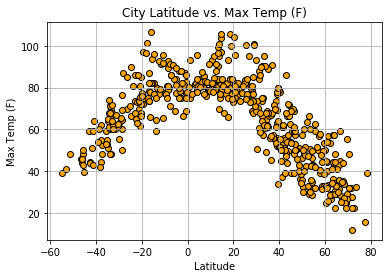

In [8]:
from scipy import stats
import scipy.stats as st

x = cities['Lat']
y = cities['Max Temp']

plt.scatter(x,y, facecolors = 'orange', edgecolor = 'black')
plt.title('City Latitude vs. Max Temp (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.grid(b= True)
plt.savefig("output/figures/lat_temp.png")

#The temperature increases as you get closer to the equator

## Latitude vs. Humidity Plot

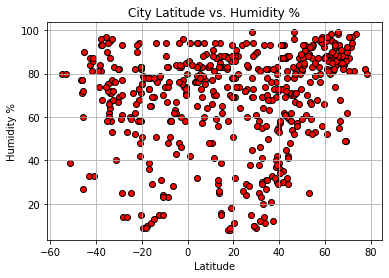

In [9]:
x = cities['Lat']
y = cities['Humidity']

plt.scatter(x,y, facecolors = 'red', edgecolor = 'black')
plt.title('City Latitude vs. Humidity %')
plt.xlabel('Latitude')
plt.ylabel('Humidity %')
plt.grid(b= True)
plt.savefig("output/figures/lat_humidity.png")
#Humidity is consistently high around the equator and becomes more distributed as you move either north or south

## Latitude vs. Cloudiness Plot

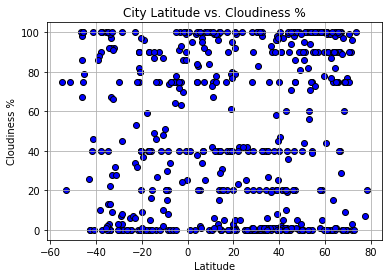

In [10]:
x = cities['Lat']
y = cities['Cloudiness']

plt.scatter(x,y, facecolors = 'blue', edgecolor = 'black')
plt.title('City Latitude vs. Cloudiness %')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness %')
plt.grid(b= True)
plt.savefig("output/figures/lat_clouds.png")
#Majority of citys have either 100% cloudiness or very low-to-0 cloudiness

## Latitude vs. Wind Speed Plot

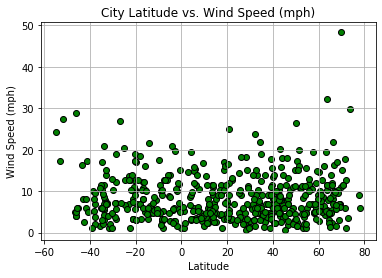

In [11]:
x = cities['Lat']
y = cities['Wind Speed']

plt.scatter(x,y, facecolors = 'green', edgecolor = 'black')
plt.title('City Latitude vs. Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid(b= True)
plt.savefig("output/figures/lat_wind.png")
#Most observed cities do not have wind speed above 10 mph

## Linear Regression

In [12]:
# Create Northern and Southern Hemisphere DataFrames
northern = cities.loc[cities['Lat']>= 0]
southern = cities.loc[cities['Lat']< 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

 The r-squared is -0.8577787840956826


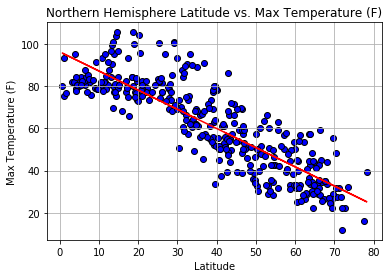

In [13]:
x = northern['Lat']
y = northern['Max Temp']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)
plt.scatter(x,y, facecolors = 'blue', edgecolor = 'black')
plt.plot(x, line, color = 'red')
plt.title('Northern Hemisphere Latitude vs. Max Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(b= True)
print(f' The r-squared is {cor[0]}')
plt.savefig("output/figures/north_lat_temp.png")
# The high -r value indicates a strong negative correlation between latitude and max temperature. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

 The r-squared is 0.7755700899337505


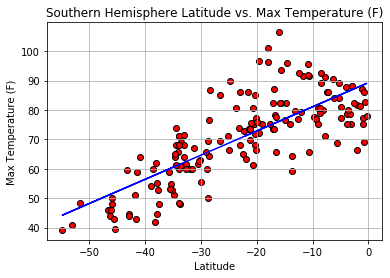

In [14]:
x = southern['Lat']
y = southern['Max Temp']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)
plt.scatter(x,y, facecolors = 'red', edgecolor = 'black')
plt.plot(x, line, color = 'blue')
plt.title('Southern Hemisphere Latitude vs. Max Temperature (F)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(b= True)
print(f' The r-squared is {cor[0]}')
plt.savefig("output/figures/south_lat_temp.png")
# The high r value indicates a strong positive correlation between latitude and max temperature. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The r-squared is 0.2647910286011006


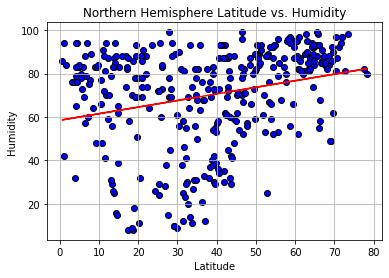

In [15]:
x = northern['Lat']
y = northern['Humidity']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)
plt.scatter(x,y, facecolors = 'blue', edgecolor = 'black')
plt.plot(x, line, color = 'red')
plt.title('Northern Hemisphere Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(b= True)
print(f' The r-squared is {cor[0]}')
plt.savefig("output/figures/north_lat_humidity.png")
#The low r values indicate a weak to no relationship between humidity and latitude.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

 The r-squared is -0.12868782378764657


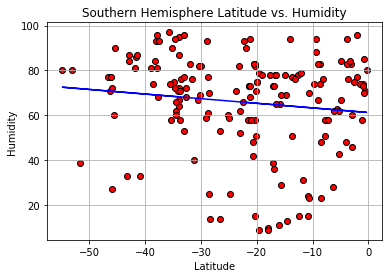

In [16]:
x = southern['Lat']
y = southern['Humidity']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)
plt.scatter(x,y, facecolors = 'red', edgecolor = 'black')
plt.plot(x, line, color = 'blue')
plt.title('Southern Hemisphere Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(b= True)
print(f' The r-squared is {cor[0]}')
plt.savefig("output/figures/south_lat_humidity.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The r-squared is 0.11246852487110681


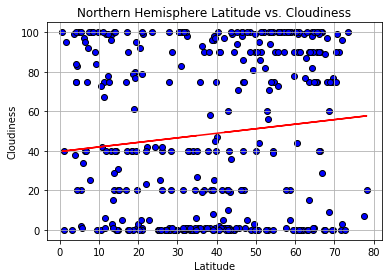

In [17]:
x = northern['Lat']
y = northern['Cloudiness']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)
plt.scatter(x,y, facecolors = 'blue', edgecolor = 'black')
plt.plot(x, line, color = 'red')
plt.title('Northern Hemisphere Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(b= True)
print(f' The r-squared is {cor[0]}')
plt.savefig("output/figures/north_lat_clouds.png")
#The low r values indicate a weak positive relationship between latitude and cloudiness.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

 The r-squared is 0.0338414283156646


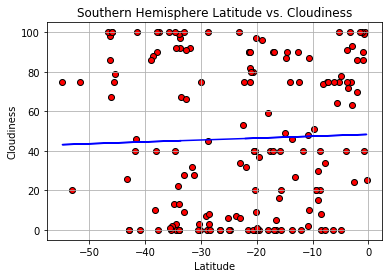

In [18]:
x = southern['Lat']
y = southern['Cloudiness']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)
plt.scatter(x,y, facecolors = 'red', edgecolor = 'black')
plt.plot(x, line, color = 'blue')
plt.title('Southern Hemisphere Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(b= True)
print(f' The r-squared is {cor[0]}')
plt.savefig("output/figures/south_lat_clouds.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The r-squared is 0.13602040195780418


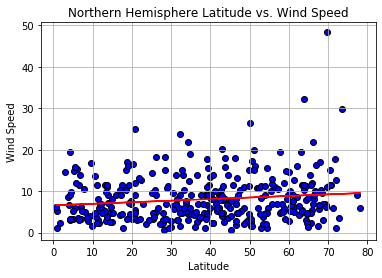

In [19]:
x = northern['Lat']
y = northern['Wind Speed']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)
plt.scatter(x,y, facecolors = 'blue', edgecolor = 'black')
plt.plot(x, line, color = 'red')
plt.title('Northern Hemisphere Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(b= True)
print(f' The r-squared is {cor[0]}')
plt.savefig("output/figures/north_lat_wind.png")
#The low r values indicate that there is no real relationship between wind speed and latitude. The difference 
#between the hemispheres doesn't seem to be significant enough to comment upon.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

 The r-squared is -0.09655122746894922


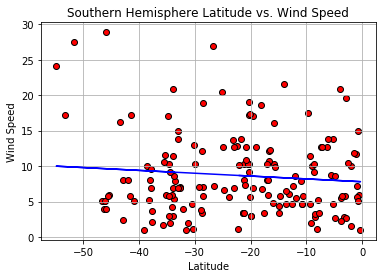

In [20]:
x = southern['Lat']
y = southern['Wind Speed']
(slope, intercept, pvalue, rvalue, stderr) = stats.linregress(x,y)
line = slope * x + intercept
cor = st.pearsonr(x,y)
plt.scatter(x,y, facecolors = 'red', edgecolor = 'black')
plt.plot(x, line, color = 'blue')
plt.title('Southern Hemisphere Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(b= True)
plt.savefig("output/figures/south_lat_wind.png")
print(f' The r-squared is {cor[0]}')

In [21]:
#Load the CSV previously exported into DataFrame
data = "output/city_data.csv"
cities = pd.read_csv(data)
cities.rename(columns = {'Unnamed: 0' : 'Drop'}, inplace = True)
del cities['Drop']
#
cities

City Country          Date    Lat     Lng  Max Temp  Humidity  \
0       busselton      AU  1.601994e+09 -33.65  115.33     48.00      58.0   
1         mataura      NZ  1.601994e+09 -46.19  168.86     46.00      77.0   
2       jamestown      US  1.601994e+09  42.10  -79.24     52.00      93.0   
3          barrow      US  1.601994e+09  71.29 -156.79     32.00      92.0   
4         rikitea      PF  1.601994e+09 -23.12 -134.97     73.69      82.0   
..            ...     ...           ...    ...     ...       ...       ...   
519      moranbah      AU  1.601994e+09 -22.00  148.05     63.27      90.0   
520  sierra vista      US  1.601994e+09  31.55 -110.30     68.00      12.0   
521       shimoda      JP  1.601994e+09  34.67  138.95     62.01      78.0   
522    tuscaloosa      US  1.601993e+09  33.21  -87.57     62.01      93.0   
523        taybad      IR  1.601993e+09  34.74   60.78     61.70      31.0   

     Cloudiness  Wind Speed  
0          97.0        5.41  
1          98.0        5.01  
2           1.0        9.17  
3          90.0        5.82  
4         100.0       13.67  
..          ...         ...  
519        32.0       10.18  
520         1.0        8.05  
521         6.0       12.37  
522         1.0        5.82  
523         0.0       18.88  

[524 rows x 9 columns]

In [22]:
#Create a Humidity map using gmaps that uses Latitude and Longitude as the location 
#and add the Humidity as a Layer Heatmap 
!jupyter nbextension list
!jupyter nbextension enable --py gmaps
from ipywidgets.embed import embed_minimal_html
#
gmaps.configure(api_key = g_key)
locations = cities[['Lat', 'Lng']]
weights = cities['Humidity']
fig = gmaps.figure(map_type = 'HYBRID', center = (0,0), zoom_level = 3)
heat = gmaps.heatmap_layer(locations, weights = weights, max_intensity = 0, point_radius = 30)
fig.add_layer(heat)
#
fig

Known nbextensions:
  config dir: C:\Users\chris\.jupyter\nbconfig
    notebook section
      jupyter-gmaps/extension enabled 
  config dir: C:\Users\chris\Anaconda3\etc\jupyter\nbconfig
    notebook section
      bqplot/extension enabled 
      ipyvolume/extension enabled 
      jupyter-webrtc/extension enabled 
      jupyter-datawidgets/extension enabled 
      jupyter-leaflet/extension enabled 
      jupyter-matplotlib/extension enabled 
      jupyter-threejs/extension enabled 
      jupyter-vue/extension enabled 
      jupyter-vuetify/extension enabled 
      jupyter-js-widgets/extension enabled 


      - Validating: ok
      - Validating: ok
      - Validating: ok
      - Validating: ok
      - Validating: ok
      - Validating: ok
      - Validating: ok
      - Validating: ok
      - Validating: ok
      - Validating: ok
      - Validating: ok
Enabling notebook extension jupyter-gmaps/extension...
      - Validating: ok


Figure(layout=FigureLayout(height='420px'))

In [23]:
#Create a new DataFrame with idyllic weather conditions that can be used for 
#potential destinations for a vacation

hotels = cities.loc[(cities["Max Temp"] <= 80) & (cities["Max Temp"] >= 70) &(cities["Cloudiness"] == 0) &(cities["Wind Speed"] < 10)]
hotels

City Country          Date    Lat     Lng  Max Temp  \
132  arkhipo-osipovka      RU  1.601994e+09  44.37   38.52     71.58   
149    cap malheureux      MU  1.601994e+09 -19.98   57.61     75.99   
171           khuzdar      PK  1.601994e+09  27.74   66.64     79.72   
196      kruisfontein      ZA  1.601994e+09 -34.00   24.73     71.01   
255        nouadhibou      MR  1.601994e+09  20.93  -17.03     78.80   
329        maningrida      AU  1.601994e+09 -12.07  134.27     79.18   
367         dickinson      US  1.601994e+09  29.46  -95.05     71.01   
385        manzanares      ES  1.601994e+09  39.00   -3.37     78.01   
463  san buenaventura      MX  1.601994e+09  27.08 -101.53     73.00   

     Humidity  Cloudiness  Wind Speed  
132      59.0         0.0        6.58  
149      75.0         0.0        3.00  
171      15.0         0.0        2.15  
196      67.0         0.0        5.99  
255      74.0         0.0        9.17  
329      79.0         0.0        8.55  
367      89.0         0.0        1.01  
385      38.0         0.0        3.36  
463      38.0         0.0        1.99

In [24]:
#Using Google Maps API, find a hotel within 5000 meters of each location and add the hotel to the dataFrame

hotels['Hotel Name'] = ''
params = {
    "radius": 5000, 
    "types": "lodging",
    "key": g_key}

for index, row in hotels.iterrows():
    city = row['City']
    lat = row["Lat"]
    lng = row["Lng"]
    
    params["location"] = f"{lat},{lng}"
    url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    response = requests.get(url, params = params)
    response = response.json()
    try:
        print(f'Finding Lodging for {city}')
        print('----------------------------')
        hotels.loc[index, "Hotel Name"] = response["results"][0]["name"]
    except (KeyError, IndexError):
        print("No Lodging Found.")
        print('----------------------------')
        hotels.loc[index, "Hotel Name"] = "No Lodging Found"
        
hotels
        

C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Finding Lodging for arkhipo-osipovka
----------------------------


C:\Users\chris\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


Finding Lodging for cap malheureux
----------------------------
Finding Lodging for khuzdar
----------------------------
Finding Lodging for kruisfontein
----------------------------
Finding Lodging for nouadhibou
----------------------------
Finding Lodging for maningrida
----------------------------
Finding Lodging for dickinson
----------------------------
Finding Lodging for manzanares
----------------------------
Finding Lodging for san buenaventura
----------------------------


City Country          Date    Lat     Lng  Max Temp  \
132  arkhipo-osipovka      RU  1.601994e+09  44.37   38.52     71.58   
149    cap malheureux      MU  1.601994e+09 -19.98   57.61     75.99   
171           khuzdar      PK  1.601994e+09  27.74   66.64     79.72   
196      kruisfontein      ZA  1.601994e+09 -34.00   24.73     71.01   
255        nouadhibou      MR  1.601994e+09  20.93  -17.03     78.80   
329        maningrida      AU  1.601994e+09 -12.07  134.27     79.18   
367         dickinson      US  1.601994e+09  29.46  -95.05     71.01   
385        manzanares      ES  1.601994e+09  39.00   -3.37     78.01   
463  san buenaventura      MX  1.601994e+09  27.08 -101.53     73.00   

     Humidity  Cloudiness  Wind Speed  \
132      59.0         0.0        6.58   
149      75.0         0.0        3.00   
171      15.0         0.0        2.15   
196      67.0         0.0        5.99   
255      74.0         0.0        9.17   
329      79.0         0.0        8.55   
367      89.0         0.0        1.01   
385      38.0         0.0        3.36   
463      38.0         0.0        1.99   

                                        Hotel Name  
132                    Zolotoy Kashtan Guest House  
149                          Pereybere Hotel & Spa  
171  jhalwan Rent A Car Moola Chotok Boking Office  
196                        Oyster Bay House Rental  
255                                      El Medina  
329                               Dhukurrdji Lodge  
367                  Candlewood Suites League City  
385                          Parador de Manzanares  
463                               Hotel Gran Plaza

In [25]:
# Add the hotel marks to the heatmap
info_box_template = """
<dl>
<dt>Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
</dl>
"""
# Store the DataFrame Row
hotel_info = [info_box_template.format(**row) for index, row in hotels.iterrows()]
lodging = hotels[["Lat", "Lng"]]


In [26]:
# Add marker layer ontop of heat map
# Display figure
hotel_plot = gmaps.symbol_layer(lodging, fill_color = 'red', stroke_color = 'blue', info_box_content = hotel_info)
fig.add_layer(hotel_plot)
#
fig

Figure(layout=FigureLayout(height='420px'))